## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

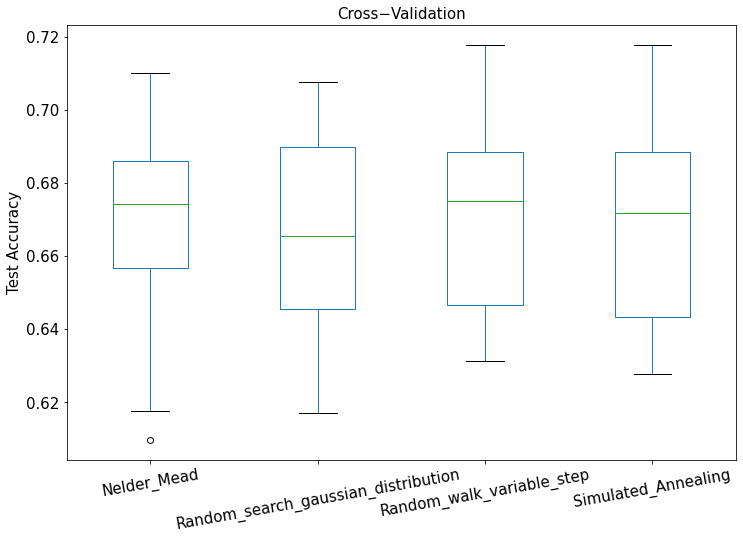

In [2]:
file_name = "Testset_classification_accuracy"
y_label = "Test Accuracy"

fontsize = 15
data = pd.read_excel(file_name + ".xlsx", engine='openpyxl',)
data.drop(columns=["Unnamed: 0"], inplace=True)
df = pd.DataFrame(data)

boxplot = df.boxplot(grid=False, rot=10, fontsize=fontsize, figsize = (12, 8))
boxplot.set_ylabel(y_label, fontsize = fontsize)
boxplot.set_title("Cross−Validation", fontsize = fontsize)
plt.savefig("Boxplot", facecolor='whitesmoke')

In [3]:
statistics = {"Mean":df.mean(), "Median":df.median(), "St.Dev.":df.std(), "Min":df.min(), "Max":df.max()}

In [4]:
df_statistics = pd.DataFrame(statistics)
df_statistics.to_excel("Statistics.xlsx")

In [5]:
# Here I need the accuracies of the methods
nm_gd = stats.ttest_ind(data["Nelder_Mead"], data["Random_search_gaussian_distribution"])[1]
nm_rw = stats.ttest_ind(data["Nelder_Mead"], data["Random_walk_variable_step"])[1]
nm_sa = stats.ttest_ind(data["Nelder_Mead"], data["Simulated_Annealing"])[1]
gd_rw = stats.ttest_ind(data["Random_search_gaussian_distribution"], data["Random_walk_variable_step"])[1]
gd_sa = stats.ttest_ind(data["Random_search_gaussian_distribution"], data["Simulated_Annealing"])[1]
rw_sa = stats.ttest_ind(data["Random_walk_variable_step"], data["Simulated_Annealing"])[1]

In [6]:
pvalues = np.array([[np.nan, nm_gd, nm_rw, nm_sa],
                    [np.nan, np.nan, gd_rw, gd_sa],
                    [np.nan, np.nan, np.nan, rw_sa]])

In [7]:
mux = pd.MultiIndex.from_arrays([["Nelder_Mead",
                                  "Random_search_gaussian_distribution",
                                  "Random_walk_variable_step"]])

pvalues_df = pd.DataFrame(pvalues, index=mux, columns = ["Nelder_Mead",
                                                         "Random_search_gaussian_distribution",
                                                         "Random_walk_variable_step",
                                                         "Simulated_Annealing"])

In [8]:
pvalues_df.fillna(value="-", inplace=True)

In [9]:
pvalues_df.to_excel("pvalues_table.xlsx")